# 

# Parking forecasting with Scikit-learn and MLPRegression for Porthaninkatu 6
Developed as part of European Union Horizon 2020 programme funded SCALE-UP project (grant agreement no. 955332).

## Import libraries, functions and constants

In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from utils import (
    compare_test_with_predicition,
    fit_model,
    get_filtered_merged_data,
    get_pipeline,
    predict,
    draw_results,
    print_results,
    BASE,
    MINUS_10,
    MINUS_20,
    ZERO,
    PLUS_10,
    PLUS_20,
    DRY_WEATHER,
    SEASONABILITY_COLUMNS,
    RAIN,
    RAIN_BOOL,
    TEMPERATURE,
    YEAR,
    RAIN_VALUE,
)



## Load and prepare data

In [2]:
df_base, df_rain_train, df_rain_bool_train, df_temperature_train = get_filtered_merged_data("../data/parkings_small.csv", area="318a1ad2-5e33-488c-85bb-c3e9644c4942")

Filtered 4260 parkings.


## Create pipelines and train models

#

mean squared error for model base: 0.925184189939741
mean squared error for model rain: 0.9360342786363178
mean squared error for model rain boolean: 0.9341192653677454
mean squared error for model temperature: 0.9550398142662356


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hour', 'month',
                                                   'dayofweek']),
                                                 ('Standard', StandardScaler(),
                                                  ['temperature', 'year'])])),
                ('regressor',
                 MLPRegressor(alpha=0.1, early_stopping=True,
                              hidden_layer_sizes=(32, 16, 4), max_iter=2000,
                              random_state=42))])

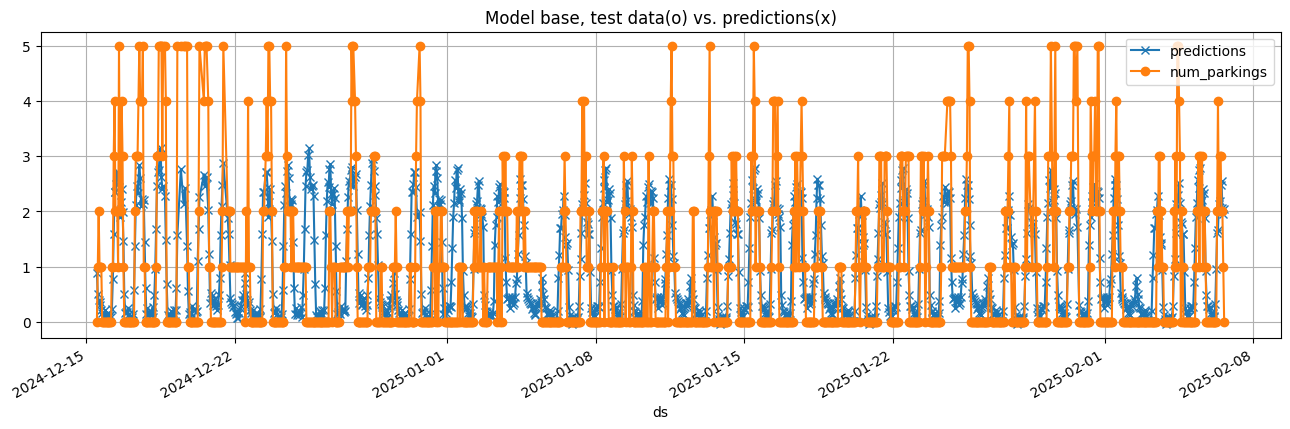

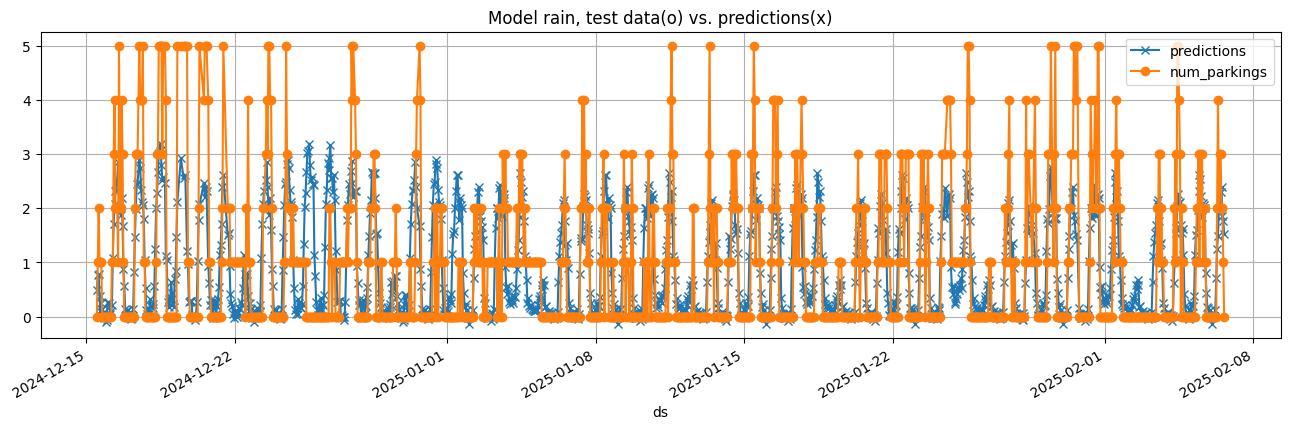

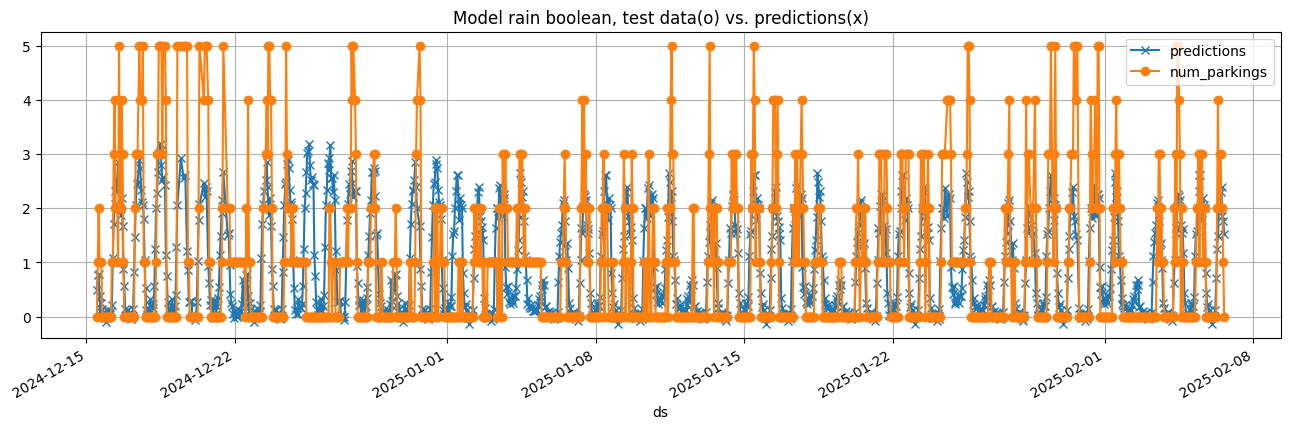

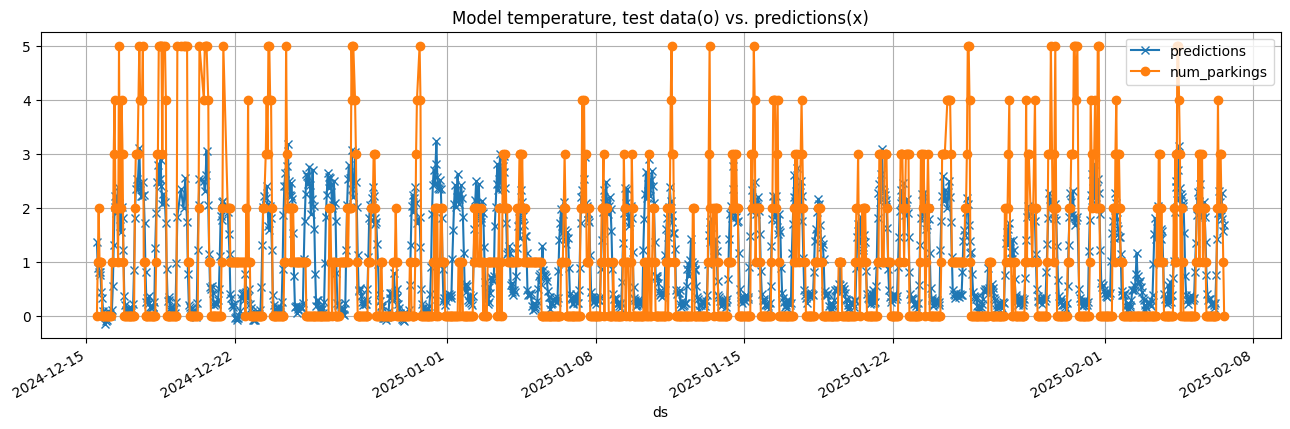

In [3]:
model = MLPRegressor(
    hidden_layer_sizes=(32,16,4),  
    activation="relu",         
    solver="adam",
    learning_rate="constant",               
    max_iter=500,              
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline = get_pipeline(model, standard_columns=[YEAR])
X_test, y_test = fit_model(pipeline, df_base, SEASONABILITY_COLUMNS)
compare_test_with_predicition(pipeline, X_test, y_test, model_name=BASE)

model = MLPRegressor(
    hidden_layer_sizes=(32,164),  
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_rain = get_pipeline(model, standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain, df_rain_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test, model_name=RAIN)

model = MLPRegressor(
    hidden_layer_sizes=(32,16,4),  
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_rain_bool = get_pipeline(model, standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain_bool, df_rain_bool_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test, model_name=RAIN_BOOL)

model = MLPRegressor(
    hidden_layer_sizes=(32, 16, 4),     
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_temperature = get_pipeline(model, standard_columns=[TEMPERATURE, YEAR])
X_test, y_test = fit_model(pipeline_temperature, df_temperature_train, SEASONABILITY_COLUMNS+[TEMPERATURE])
compare_test_with_predicition(pipeline_temperature, X_test, y_test, model_name=TEMPERATURE)

## Make predictions

In [4]:
results = {}
date_range = pd.date_range(start="2025-02-07 11:00:00", end="2025-03-09 11:00:00", freq="h")
results[BASE] = predict(pipeline, date_range)
results[RAIN] = predict(pipeline_rain, date_range, rain=RAIN_VALUE)
results[RAIN_BOOL] = predict(pipeline_rain_bool, date_range, rain=True)
results[DRY_WEATHER] = predict(pipeline_rain, date_range, rain=False)
results[MINUS_20] = predict(pipeline_temperature, date_range, temperature=-20)
results[MINUS_10] = predict(pipeline_temperature, date_range, temperature=-10)
results[ZERO] = predict(pipeline_temperature, date_range, temperature=0)
results[PLUS_10] = predict(pipeline_temperature, date_range, temperature=10)
results[PLUS_20] = predict(pipeline_temperature, date_range, temperature=20)
print_results(date_range, results)

Forecast period: 2025-02-07 11:00:00 - 2025-03-09 11:00:00
Base forecast for parkings: 698.
Forecast for parkings in rain: 596.  Diff to base -102 (-14.61%)
Forecast for parkings in rain boolean: 589.  Diff to base -109 (-15.62%)
Forecast for parkings in dry weather: 609.  Diff to base -89 (-12.75%)
Forecast for parkings in -20 degrees temperature: 1348.  Diff to base 650 (93.12%)
Forecast for parkings in -10 degrees temperature: 1004.  Diff to base 306 (43.84%)
Forecast for parkings in 0 degrees temperature: 743.  Diff to base 45 (6.45%)
Forecast for parkings in 10 degrees temperature: 600.  Diff to base -98 (-14.04%)
Forecast for parkings in 20 degrees temperature: 671.  Diff to base -27 (-3.87%)


## Conclusions
### Model Comparison
Mean squared error (model accuracy):
* Model base: 0.93
* Model rain: 0.94
* Model rain boolean: 0.93
* Model temperature: 0.96

### Weather Impact Analysis 
Weather impace was measured by forecasting 30 days in future with given static weather values.  Forecast total cars is a sum of all hourly cars in the 30 day period. 

| Forecast Condition                          | Forecast Parkings | Diff to Base | Percent Diff  |
|---------------------------------------------|-------------------|--------------|---------------|
| Base forecast for parkings                  | 698               | -            | -             |
| Forecast for parkings in rain               | 596               | -102         | -14.61%       |
| Forecast for parkings in rain (boolean)     | 589               | -109         | -15.62%       |
| Forecast for parkings in dry weather        | 609               | -89          | -12.75%       |
| Forecast for parkings in -20 degrees temp   | 1348              | 650          | 93.12%        |
| Forecast for parkings in -10 degrees temp   | 1004              | 306          | 43.84%        |
| Forecast for parkings in 0 degrees temp     | 743               | 45           | 6.45%         |
| Forecast for parkings in 10 degrees temp    | 600               | -98          | -14.04%       |
| Forecast for parkings in 20 degrees temp    | 671               | -27          | -3.87%        |

### Key Insights


1. **Impact of Rain:**
   - Rain has a notable negative effect on the forecasted number of parkings, with a **14.61% decrease** in parkings (596 forecasted vs. 698 base).
   - The boolean forecast for rain (589 parkings) shows an even larger **15.62% decrease**, suggesting that weather in general leads to fewer parkings.

2. **Impact of Temperature:**
   - Colder temperatures lead to an **increase in parkings**, with a significant rise of **93.12%** in -20°C (forecasted at 1348 parkings).
   - A rise in temperature to **-10°C** also results in an increase in parkings by **43.84%** (1004 parkings).

3. **Milder Weather (0-20°C):**
   - Mild temperatures show less variation from the base forecast.
   - At **0°C**, the forecasted parkings are **slightly higher** (743 vs. 698, +6.45%).
   - **10°C** and **20°C** temperatures see a **decrease** of **14.04%** and **3.87%**, respectively, suggesting that temperatures around 10-20°C may have a minor negative effect on parking demand.

4. **General Trend:**
   - The data shows that extreme cold (especially -20°C) significantly boosts parking numbers, likely due to a possible increase in demand for indoor or covered parking.
   - On the other hand, rain and moderate temperatures (10-20°C) tend to reduce parking demand.

## Draw predicitions

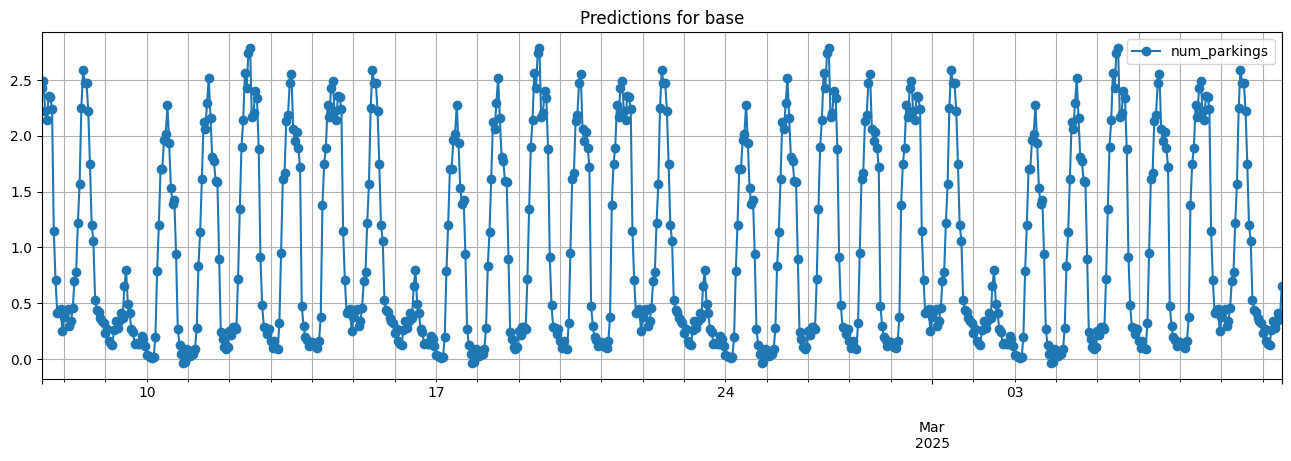

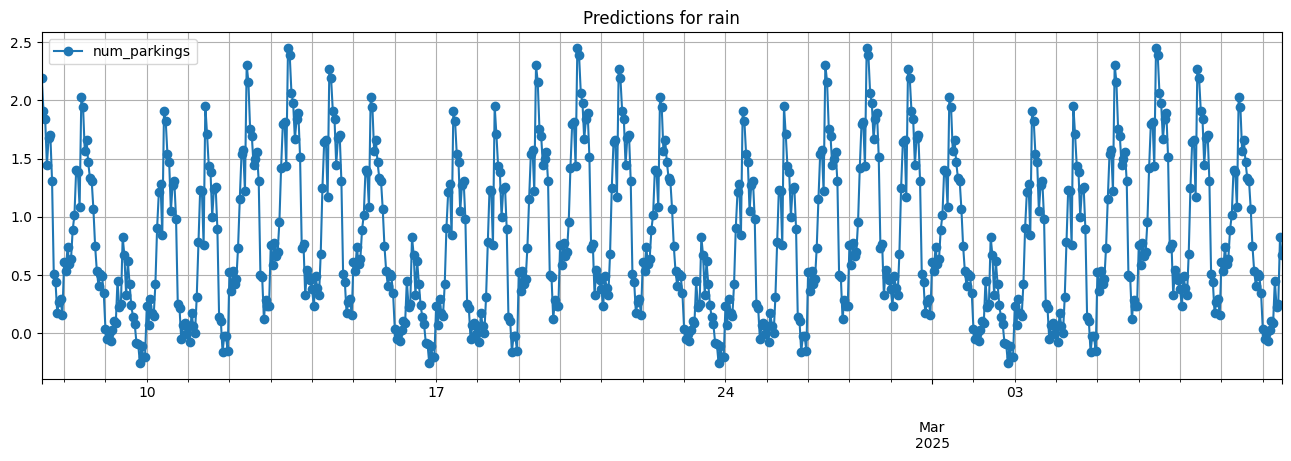

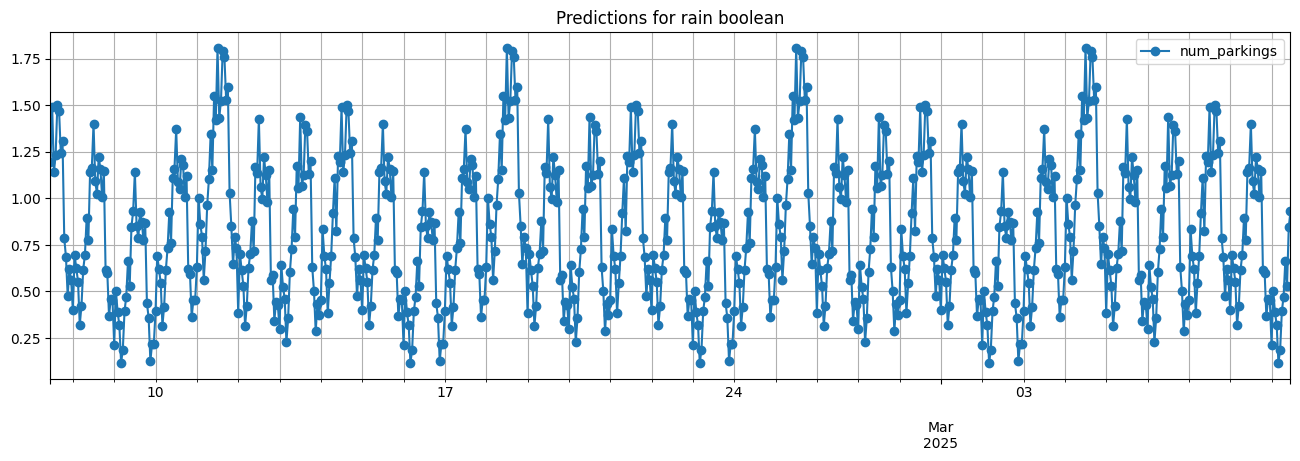

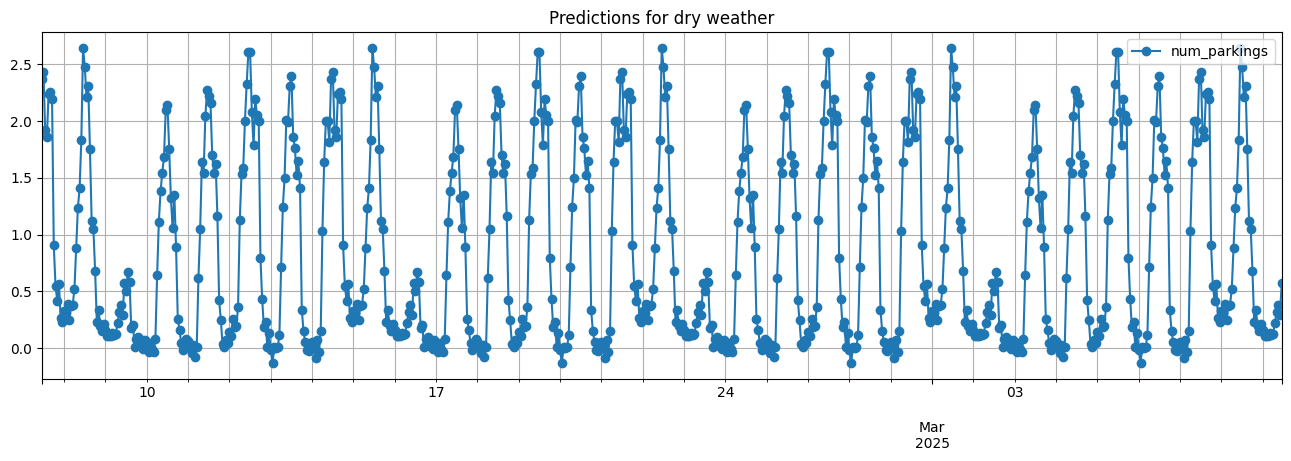

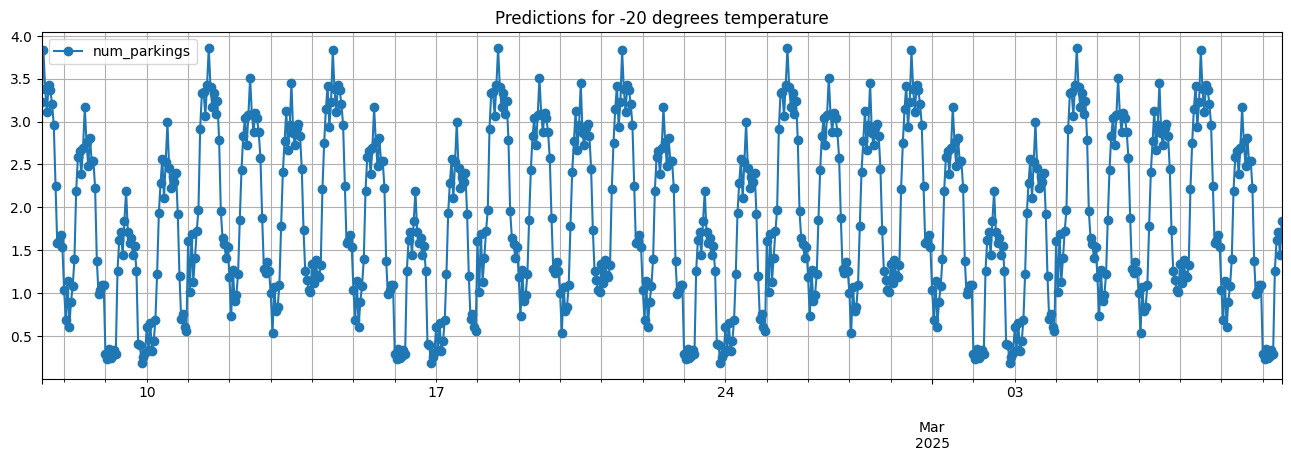

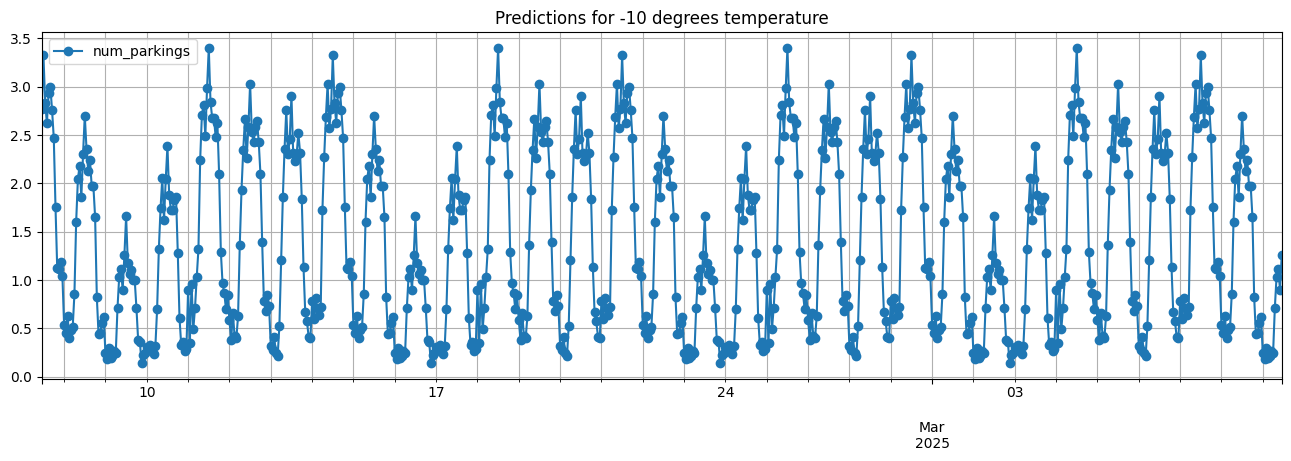

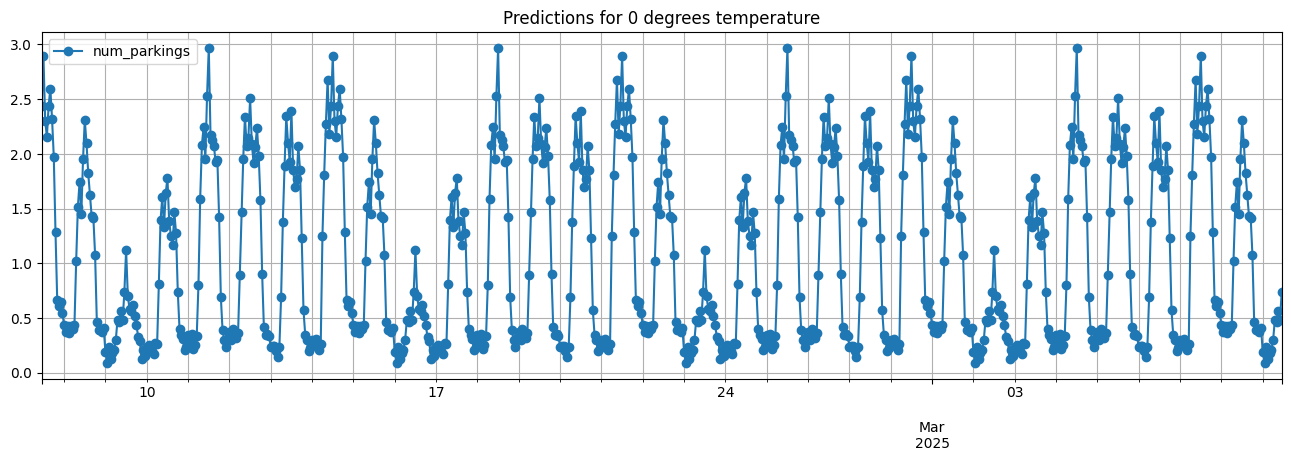

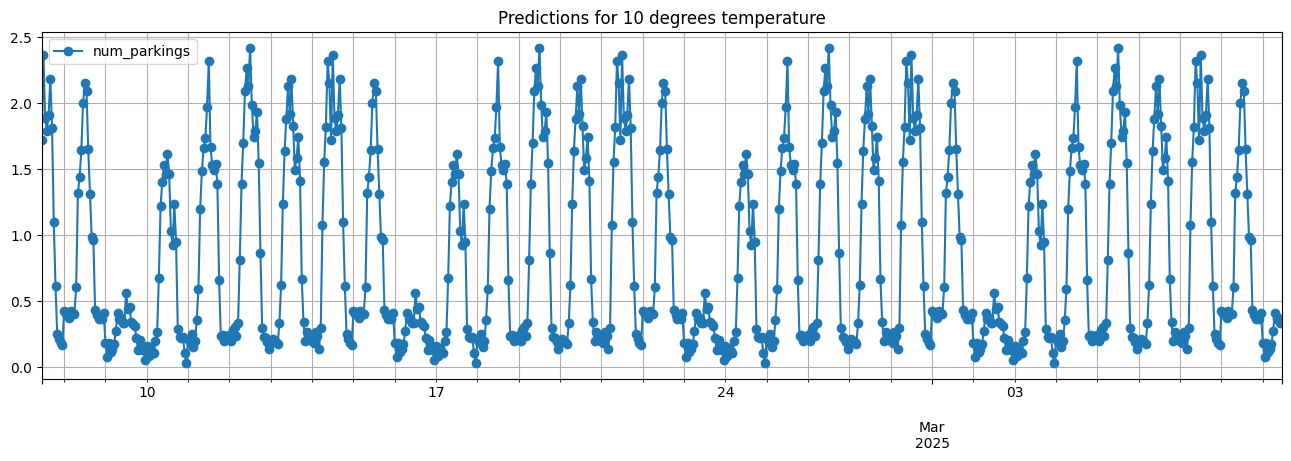

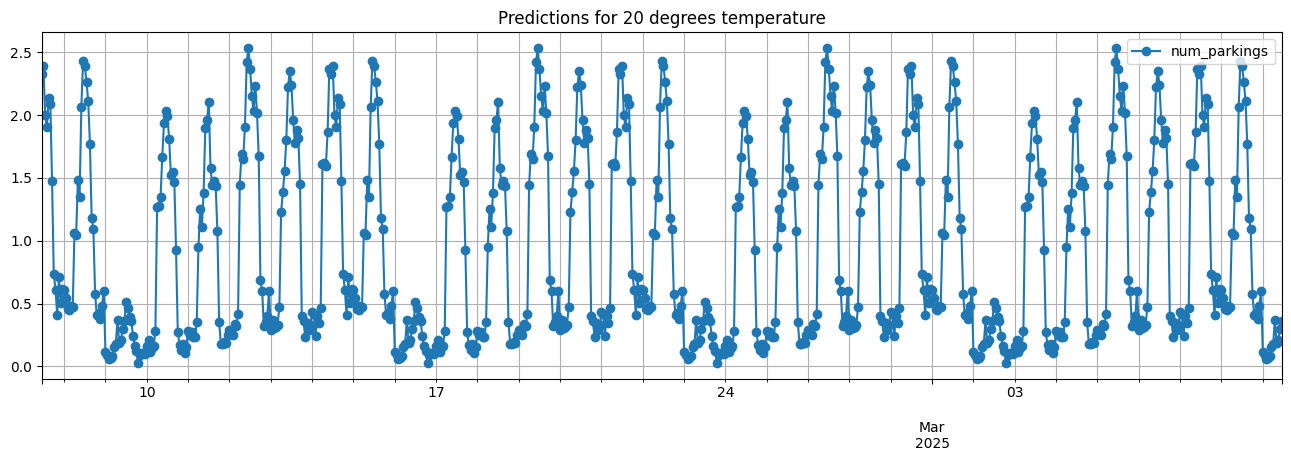

In [5]:
draw_results(results)